# Diabetes Risk Prediction - Pipeline Machine Learning Model

### Introduction

About the Dataset

For this project, the dataset collected by the National Health and Nutrition Examination Survey (NHANES) has been used. NHANES is a comprehensive research dataset that gathers health and nutrition data from various demographic groups in the United States. The dataset provides important information about individuals' health status, dietary habits, physical test results, and biochemical data.

The dataset consists of 6 main components:

* Demographic Data: Includes socioeconomic characteristics such as age, gender, ethnicity, education level, and income level of the participants.
* Examination Data: Contains physical health indicators, such as body mass index (BMI), blood pressure, height, and weight measurements.
* Diet Data: Provides information about participants' daily dietary habits, calorie intake, types of food, and quantities consumed.
* Lab Data: Includes biochemical test results, such as blood sugar levels, cholesterol levels, and liver function tests.
* Medications Data: Provides information about the medications, prescriptions, and treatment information used by the participants.
* Questionnaire Data: Contains survey responses regarding lifestyle, physical activity levels, smoking habits, and other health-related behaviors of the participants.

This dataset offers a rich source for understanding the relationships between health status, dietary habits, and environmental factors.

About the Project

This project is a machine learning study developed to predict whether individuals have diabetes, using the National Health and Nutrition Examination Survey (NHANES) dataset. NHANES provides a comprehensive dataset containing health status and lifestyle data, offering a valuable resource for predicting diseases such as diabetes.

For data analysis, Python’s popular data science packages will be used. In the first phase, the data from the CSV file will be read using the pandas library, and a detailed exploration will be conducted. Exploratory data analysis will be performed using pandas and numpy, where columns will be examined and relationships between different features will be explored.

During the data cleaning and processing phase, missing values will be identified and appropriately filled or removed. Additionally, after identifying distinguishing features, outliers will be detected and cleaned, and data types will be correctly converted to prepare the dataset for analysis.

Subsequently, appropriate classification models for predicting diabetes will be developed. These models will be evaluated for accuracy and reliability, and the best model will be selected.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer   
import scipy.stats as stats
from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import StandardScaler             
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
sns.set_theme(context='notebook', palette='muted', style='white')

### Data loading, Review

In [2]:
# Configure dataset directory
# Since this notebook is in models/lifestyle/, data is in ../../data/datasets/nhanes/
data_dir = '../../data/datasets/nhanes'

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/national-health-and-nutrition-examination-survey/examination.csv
/kaggle/input/national-health-and-nutrition-examination-survey/medications.csv
/kaggle/input/national-health-and-nutrition-examination-survey/demographic.csv
/kaggle/input/national-health-and-nutrition-examination-survey/labs.csv
/kaggle/input/national-health-and-nutrition-examination-survey/questionnaire.csv
/kaggle/input/national-health-and-nutrition-examination-survey/diet.csv


In [3]:
examination = pd.read_csv(f'{data_dir}/examination.csv')
examination.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [4]:
medications = pd.read_csv(f'{data_dir}/medications.csv', encoding='latin1')
medications.head()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [5]:
demographic = pd.read_csv(f'{data_dir}/demographic.csv')
demographic.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [6]:
labs = pd.read_csv(f'{data_dir}/labs.csv')
labs.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [7]:
questionnaire = pd.read_csv(f'{data_dir}/questionnaire.csv')
questionnaire.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [8]:
diet = pd.read_csv(f'{data_dir}/diet.csv')
diet.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


The dataset consists of 6 different components (demographic information, laboratory results, questionnaire data, examination data, medication usage, survey data, etc.). These components will be merged based on the common identifier number (SEQN) for the participants.

After the merging process, only the necessary and meaningful columns will be selected to improve the model's prediction performance. Following the data merging step, preprocessing, data cleaning, feature selection, and statistical analysis will be applied in detail. These steps will be performed to ensure that the model produces more accurate and reliable results.

### Exploraty Data Analysis

In [9]:
datasets = {
    'Examination': examination,
    'Medications': medications,
    'Demographic': demographic,
    'Labs': labs,
    'Questionnaire': questionnaire,
    'Diet': diet
}

print('------- Uploaded Dataset Sizes -------')
for name, df in datasets.items():   
    print(f"  {name:15s}: {df.shape[0]:6d} row {df.shape[1]:4d} column")

------- Uploaded Dataset Sizes -------
  Examination    :   9813 row  224 column
  Medications    :  20194 row   13 column
  Demographic    :  10175 row   47 column
  Labs           :   9813 row  424 column
  Questionnaire  :  10175 row  953 column
  Diet           :   9813 row  168 column


In [10]:
train = examination.copy()
train = pd.merge(train, medications, on='SEQN', how='outer')
train = pd.merge(train, demographic, on='SEQN', how='outer')
train = pd.merge(train, labs, on='SEQN', how='outer')
train = pd.merge(train, questionnaire, on='SEQN', how='outer')
train = pd.merge(train, diet, on='SEQN', how='outer')
print(f'combined dataset size : {train.shape}')

combined dataset size : (20194, 1824)


In [11]:
train_df = train[[
     'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'BMXBMI', 
     'BMXWAIST', 'BPXSY1', 'BPXDI1', 'LBXGH', 
     'LBDHDD', 'BPQ020', 'BPQ080', 'MCQ160C', 'DIQ010'                
]].copy()

train_df.columns = [
    'gender', 'age', 'ethnicity', 'bmi', 
    'waist_circumference', 'systolic_bp', 'diastolic_bp',
    'HbA1c', 'hdl_cholesterol', 'has_hypertension', 
    'takes_cholesterol_med', 'family_diabetes_history', 'diabetes'
]

train_df.head()

,gender,age,ethnicity,bmi,waist_circumference,systolic_bp,diastolic_bp,HbA1c,hdl_cholesterol,has_hypertension,takes_cholesterol_med,family_diabetes_history,diabetes
0,1,69,4,26.7,100.0,122.0,72.0,13.9,65.0,1.0,1.0,2.0,1.0
1,1,69,4,26.7,100.0,122.0,72.0,13.9,65.0,1.0,1.0,2.0,1.0
2,1,54,3,28.6,107.6,156.0,62.0,9.1,50.0,1.0,1.0,2.0,1.0
3,1,54,3,28.6,107.6,156.0,62.0,9.1,50.0,1.0,1.0,2.0,1.0
4,1,54,3,28.6,107.6,156.0,62.0,9.1,50.0,1.0,1.0,2.0,1.0


In [12]:
print('\n ------- Data shape -------')
print(f'train data shape {train_df.shape}')

print('\n ------- Data types -------')
print(train_df.info())

print('\n ------- missing value -------')
print(train_df.isna().sum()[train_df.isna().sum()>0])

print('\n ------- statiscal summary -------')
display(train_df.describe())


 ------- Data shape -------
train data shape (20194, 13)

 ------- Data types -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   20194 non-null  int64  
 1   age                      20194 non-null  int64  
 2   ethnicity                20194 non-null  int64  
 3   bmi                      18522 non-null  float64
 4   waist_circumference      17448 non-null  float64
 5   systolic_bp              15722 non-null  float64
 6   diastolic_bp             15722 non-null  float64
 7   HbA1c                    15752 non-null  float64
 8   hdl_cholesterol          16814 non-null  float64
 9   has_hypertension         16011 non-null  float64
 10  takes_cholesterol_med    16011 non-null  float64
 11  family_diabetes_history  15223 non-null  float64
 12  diabetes                 19771 non-null  fl

,gender,age,ethnicity,bmi,waist_circumference,systolic_bp,diastolic_bp,HbA1c,hdl_cholesterol,has_hypertension,takes_cholesterol_med,family_diabetes_history,diabetes
count,20194.000000,20194.000000,20194.000000,18522.000000,17448.000000,15722.000000,15722.000000,15752.000000,16814.000000,16011.000000,16011.000000,15223.000000,19771.000000
mean,1.533376,45.373329,3.271219,28.415333,96.306345,123.534538,66.623712,5.986091,51.944808,1.436450,1.570858,1.953951,1.823175
std,0.498897,25.661984,1.452760,8.570880,22.684470,19.774271,14.712546,1.238664,15.721039,0.543089,0.848939,0.696705,0.494983
min,1.000000,0.000000,1.000000,12.100000,40.200000,66.000000,0.000000,3.500000,10.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,20.000000,3.000000,22.600000,82.400000,110.000000,58.000000,5.300000,41.000000,1.000000,1.000000,2.000000,2.000000
50%,2.000000,51.000000,3.000000,27.500000,97.500000,120.000000,68.000000,5.600000,50.000000,1.000000,2.000000,2.000000,2.000000
75%,2.000000,67.000000,4.000000,33.000000,110.500000,134.000000,76.000000,6.200000,60.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,80.000000,7.000000,82.900000,177.900000,228.000000,122.000000,17.500000,173.000000,9.000000,9.000000,9.000000,9.000000


After merging the main components of the dataset, I selected the most important columns for diabetes prediction. Then, I made naming adjustments to make 
these columns more understandable and easier to analyze. However, the new dataset I created is quite messy.There are numerous missing values in the 
dataset. I will fill or remove these missing values appropriately based on the situation. Additionally, when I examined the data types, I found that some
columns appeared to be numeric but were actually categorical data. I will perform the necessary steps to properly organize and use this data in the 
correct format. Finally, by analyzing the relationships between the selected features, I will determine which features are more meaningful to improve 
the model's accuracy.

### Data Preprocessing

* Distribution target feature

In [13]:
train_df['diabetes'].value_counts()

diabetes
2.0    14909
1.0     4217
3.0      632
9.0       12
7.0        1
Name: count, dtype: int64

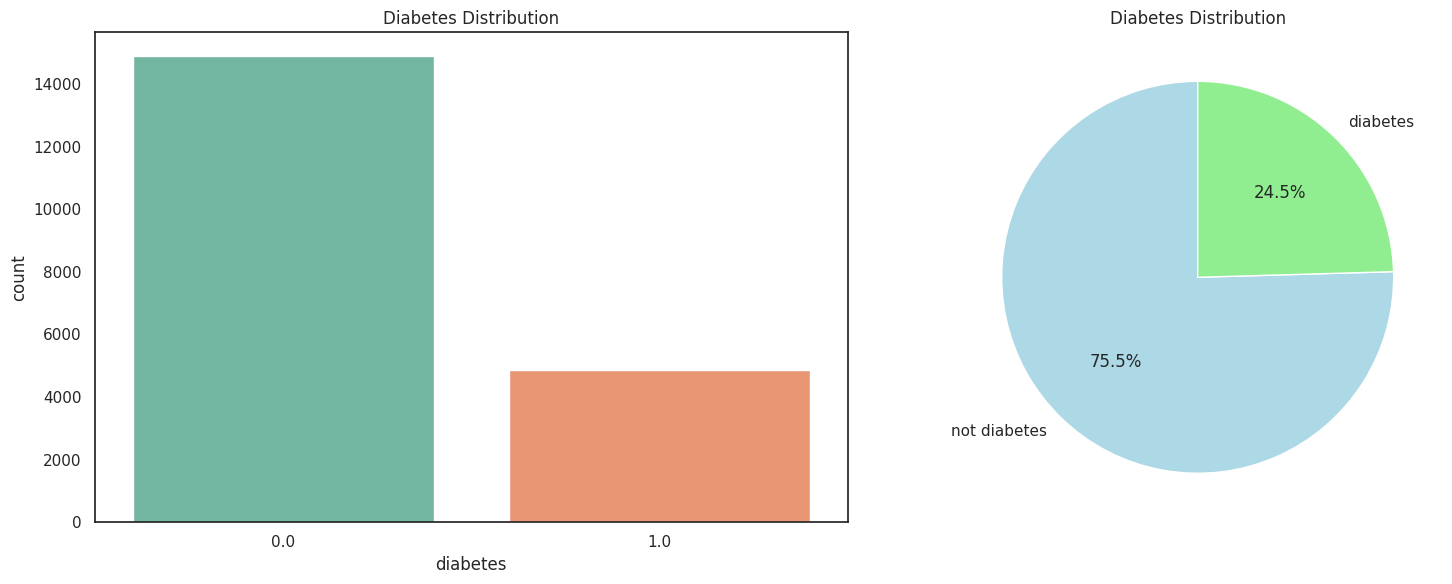


diabetes
0.0    14909
1.0     4849
Name: count, dtype: int64
missing value : 0


In [14]:
train_df = train_df[train_df['diabetes'].isin([1.0, 2.0, 3.0])]
train_df['diabetes'] = train_df['diabetes'].replace({1.0: 1, 3.0: 1, 2.0: 0})

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

sns.countplot(x='diabetes', data=train_df, palette='Set2', ax=axes[0])
axes[0].set_title('Diabetes Distribution')

train_df['diabetes'].value_counts().plot.pie(labels = ['not diabetes', 'diabetes'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], ax=axes[1], startangle=90)
axes[1].set_ylabel('')  
axes[1].set_title('Diabetes Distribution')

plt.tight_layout()
plt.show()

print('')
print(train_df['diabetes'].value_counts())

print(f'missing value : {train_df["diabetes"].isna().sum()}')

* Distribution numeric feature

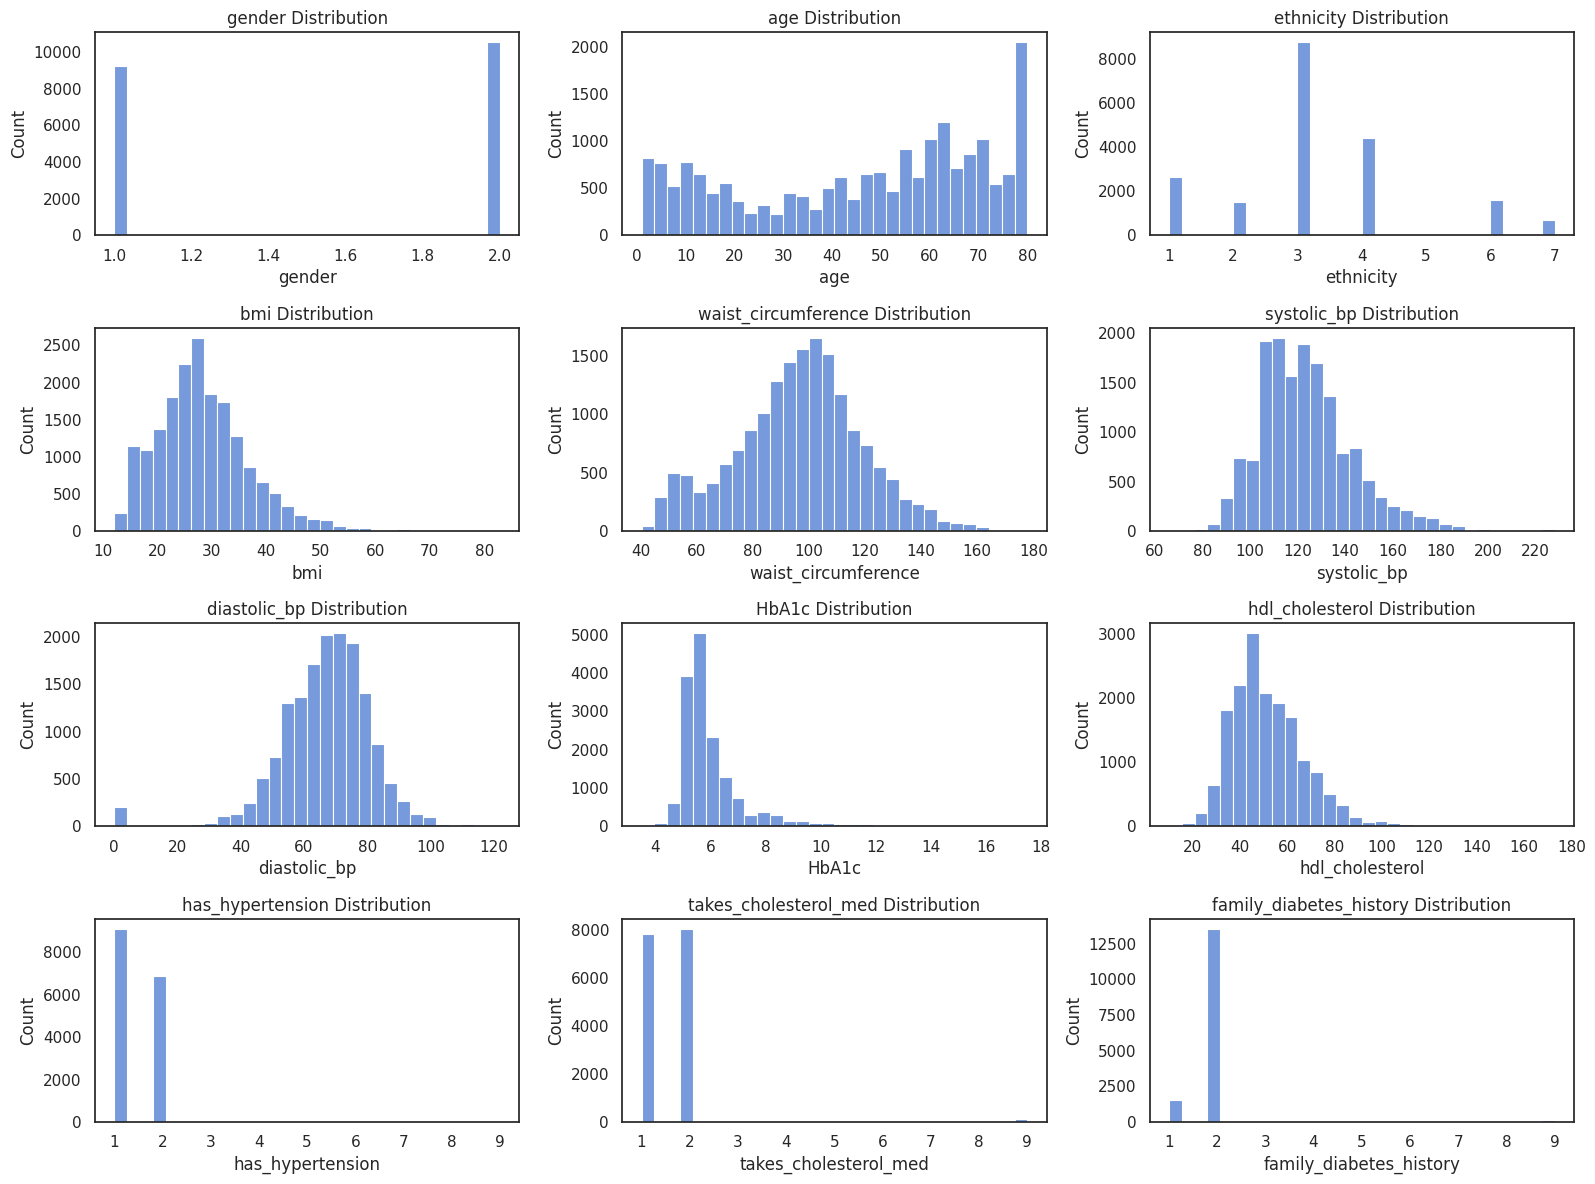

In [15]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols[num_cols != 'diabetes']

plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(train_df[col], kde=False, bins=30)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [16]:
numeric_cols = ['bmi', 'waist_circumference', 'systolic_bp', 'diastolic_bp', 'HbA1c', 'hdl_cholesterol']

imputer = SimpleImputer(strategy='median')
train_df[numeric_cols] = imputer.fit_transform(train_df[numeric_cols])


missing_value = train_df[numeric_cols].isnull().sum().sum()  

if missing_value > 0:
    print(f"There are {missing_value} missing values in the numerical columns.")
else:
    print('No missing values')

No missing values


* Distribution categoric feature

gender
1     9213
2    10545
Name: count, dtype: int64
missing value: 0
has_hypertension
1.0    9112
2.0    6875
9.0      14
NaN    3757
Name: count, dtype: int64
missing value: 3757
takes_cholesterol_med
1.0    7817
2.0    8048
9.0     136
NaN    3757
Name: count, dtype: int64
missing value: 3757
family_diabetes_history
1.0     1541
2.0    13552
9.0      120
NaN     4545
Name: count, dtype: int64
missing value: 4545
ethnicity
1    2649
2    1525
3    8793
4    4431
6    1634
7     726
Name: count, dtype: int64
missing value: 0


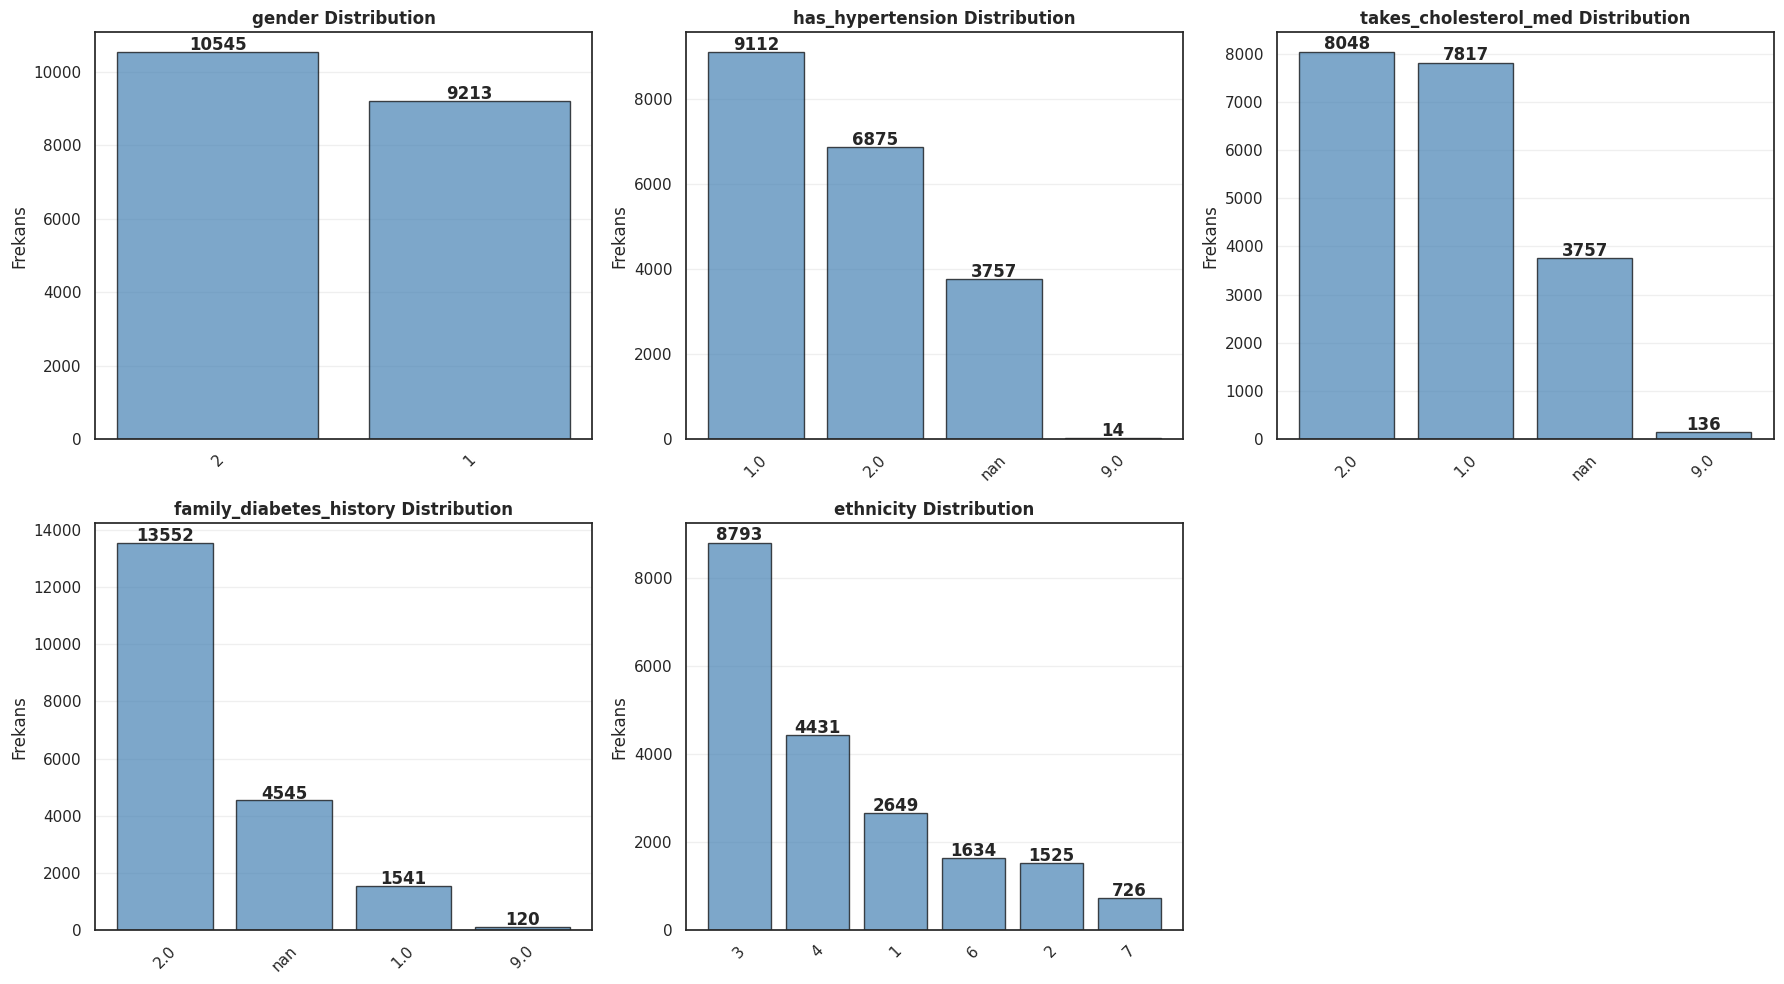

In [17]:
cat_cols = ['gender', 'has_hypertension', 'takes_cholesterol_med', 'family_diabetes_history', 'ethnicity']

for col in cat_cols:
    print(train_df[col].value_counts(dropna=False).sort_index())
    print(f"missing value: {train_df[col].isnull().sum()}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    value_counts = train_df[col].value_counts(dropna=False)
    axes[i].bar(range(len(value_counts)), value_counts.values, 
                color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45)
    axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Frekans')
    axes[i].grid(axis='y', alpha=0.3)
    
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v + 50, str(v), ha='center', fontweight='bold')

axes[-1].axis('off')

plt.tight_layout()
plt.show()

* outlier analysis

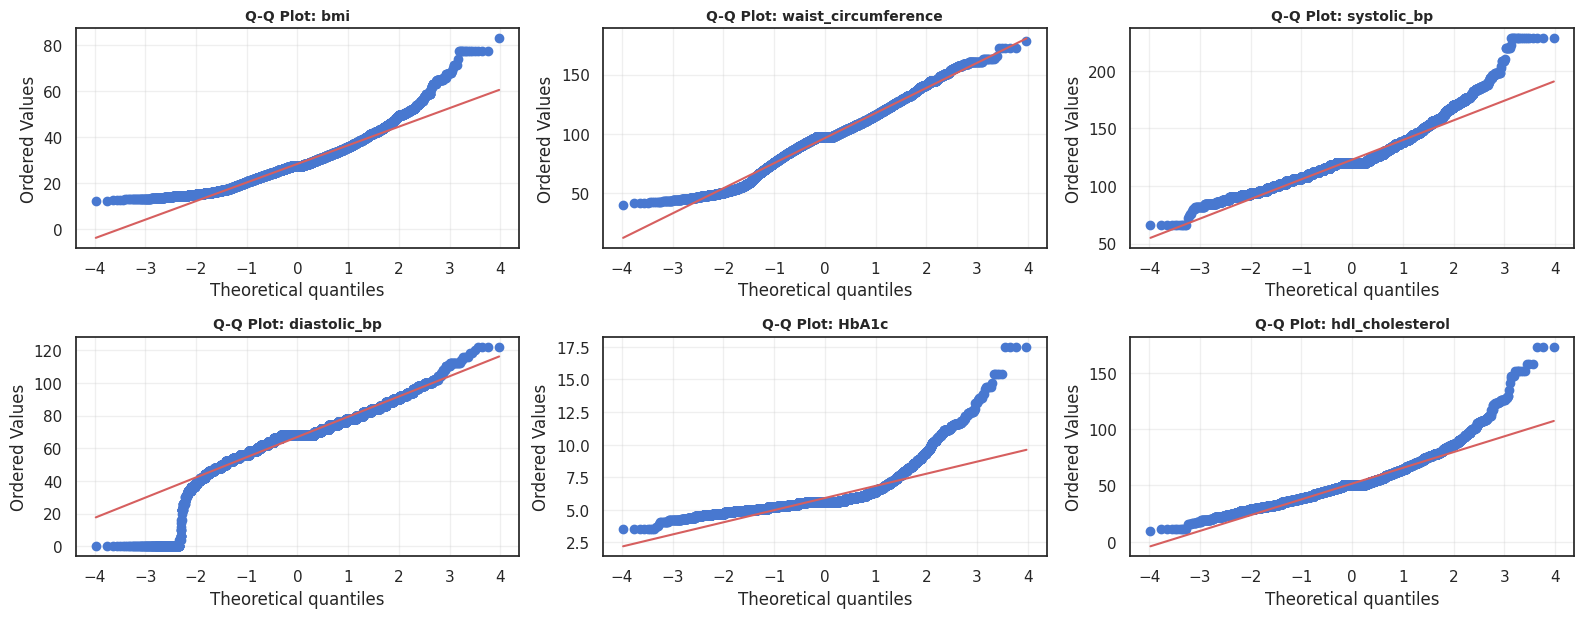

In [18]:
numeric_cols = ['bmi', 'waist_circumference', 'systolic_bp', 'diastolic_bp', 'HbA1c', 'hdl_cholesterol']

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    data = train_df[col].dropna()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col}', fontsize=10, fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

* encoder

In [19]:
print("\n GENDER ")
print("  1.0 → 1 (male)")
print("  2.0 → 0 (female)")
train_df['gender'] = train_df['gender'].replace({1.0: 1, 2.0: 0})
print(train_df['gender'].value_counts().to_dict())


print("\n HAS_HYPERTENSION ")
print("  1.0 → 1 (yes)")
print("  2.0 → 0 (no)")
train_df = train_df[train_df['has_hypertension'].isin([1.0, 2.0])]
train_df['has_hypertension'] = train_df['has_hypertension'].replace({1.0: 1, 2.0: 0})
print(train_df['has_hypertension'].value_counts().to_dict())


print("\n TAKES_CHOLESTEROL_MED ")
print("  1.0 → 1 (yes)")
print("  2.0 → 0 (no)")
train_df = train_df[train_df['takes_cholesterol_med'].isin([1.0, 2.0])]
train_df['takes_cholesterol_med'] = train_df['takes_cholesterol_med'].replace({1.0: 1, 2.0: 0})
print(train_df['takes_cholesterol_med'].value_counts().to_dict())


print("\n FAMILY_DIABETES_HISTORY ")
print("  1.0 → 1 (yes)")
print("  2.0 → 0 (no)")
train_df = train_df[train_df['family_diabetes_history'].isin([1.0, 2.0])]
train_df['family_diabetes_history'] = train_df['family_diabetes_history'].replace({1.0: 1, 2.0: 0})
print(train_df['family_diabetes_history'].value_counts().to_dict())


print("\n ETHNICITY ")
ethnicity_before = train_df['ethnicity'].value_counts().to_dict()
print(f"before categories: {ethnicity_before}")

train_df = pd.get_dummies(train_df, columns=['ethnicity'], prefix='Eth', drop_first=True)

eth_cols = train_df.filter(like='Eth_').columns
train_df[eth_cols] = train_df[eth_cols].astype(int)

print(f"created dummy variables: {list(eth_cols)}")


 GENDER 
  1.0 → 1 (male)
  2.0 → 0 (female)
{0: 10545, 1: 9213}

 HAS_HYPERTENSION 
  1.0 → 1 (yes)
  2.0 → 0 (no)
{1.0: 9112, 0.0: 6875}

 TAKES_CHOLESTEROL_MED 
  1.0 → 1 (yes)
  2.0 → 0 (no)
{0.0: 8036, 1.0: 7816}

 FAMILY_DIABETES_HISTORY 
  1.0 → 1 (yes)
  2.0 → 0 (no)
{0.0: 13438, 1.0: 1509}

 ETHNICITY 
before categories: {3: 7418, 4: 3207, 1: 1638, 6: 1211, 2: 1066, 7: 407}
created dummy variables: ['Eth_2', 'Eth_3', 'Eth_4', 'Eth_6', 'Eth_7']


In [20]:
train_df.head()

,gender,age,bmi,waist_circumference,systolic_bp,diastolic_bp,HbA1c,hdl_cholesterol,has_hypertension,takes_cholesterol_med,family_diabetes_history,diabetes,Eth_2,Eth_3,Eth_4,Eth_6,Eth_7
0,1,69,26.7,100.0,122.0,72.0,13.9,65.0,1.0,1.0,0.0,1.0,0,0,1,0,0
1,1,69,26.7,100.0,122.0,72.0,13.9,65.0,1.0,1.0,0.0,1.0,0,0,1,0,0
2,1,54,28.6,107.6,156.0,62.0,9.1,50.0,1.0,1.0,0.0,1.0,0,1,0,0,0
3,1,54,28.6,107.6,156.0,62.0,9.1,50.0,1.0,1.0,0.0,1.0,0,1,0,0,0
4,1,54,28.6,107.6,156.0,62.0,9.1,50.0,1.0,1.0,0.0,1.0,0,1,0,0,0


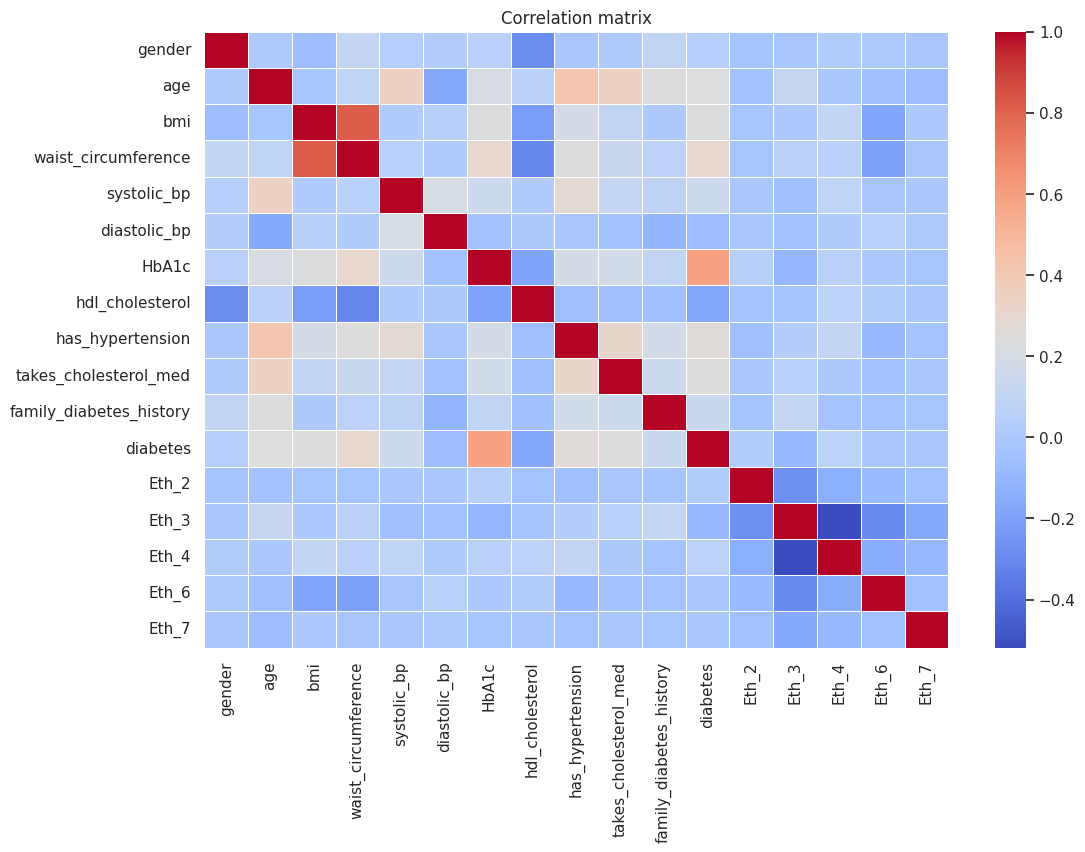

In [21]:
corr = train_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation matrix')
plt.show()

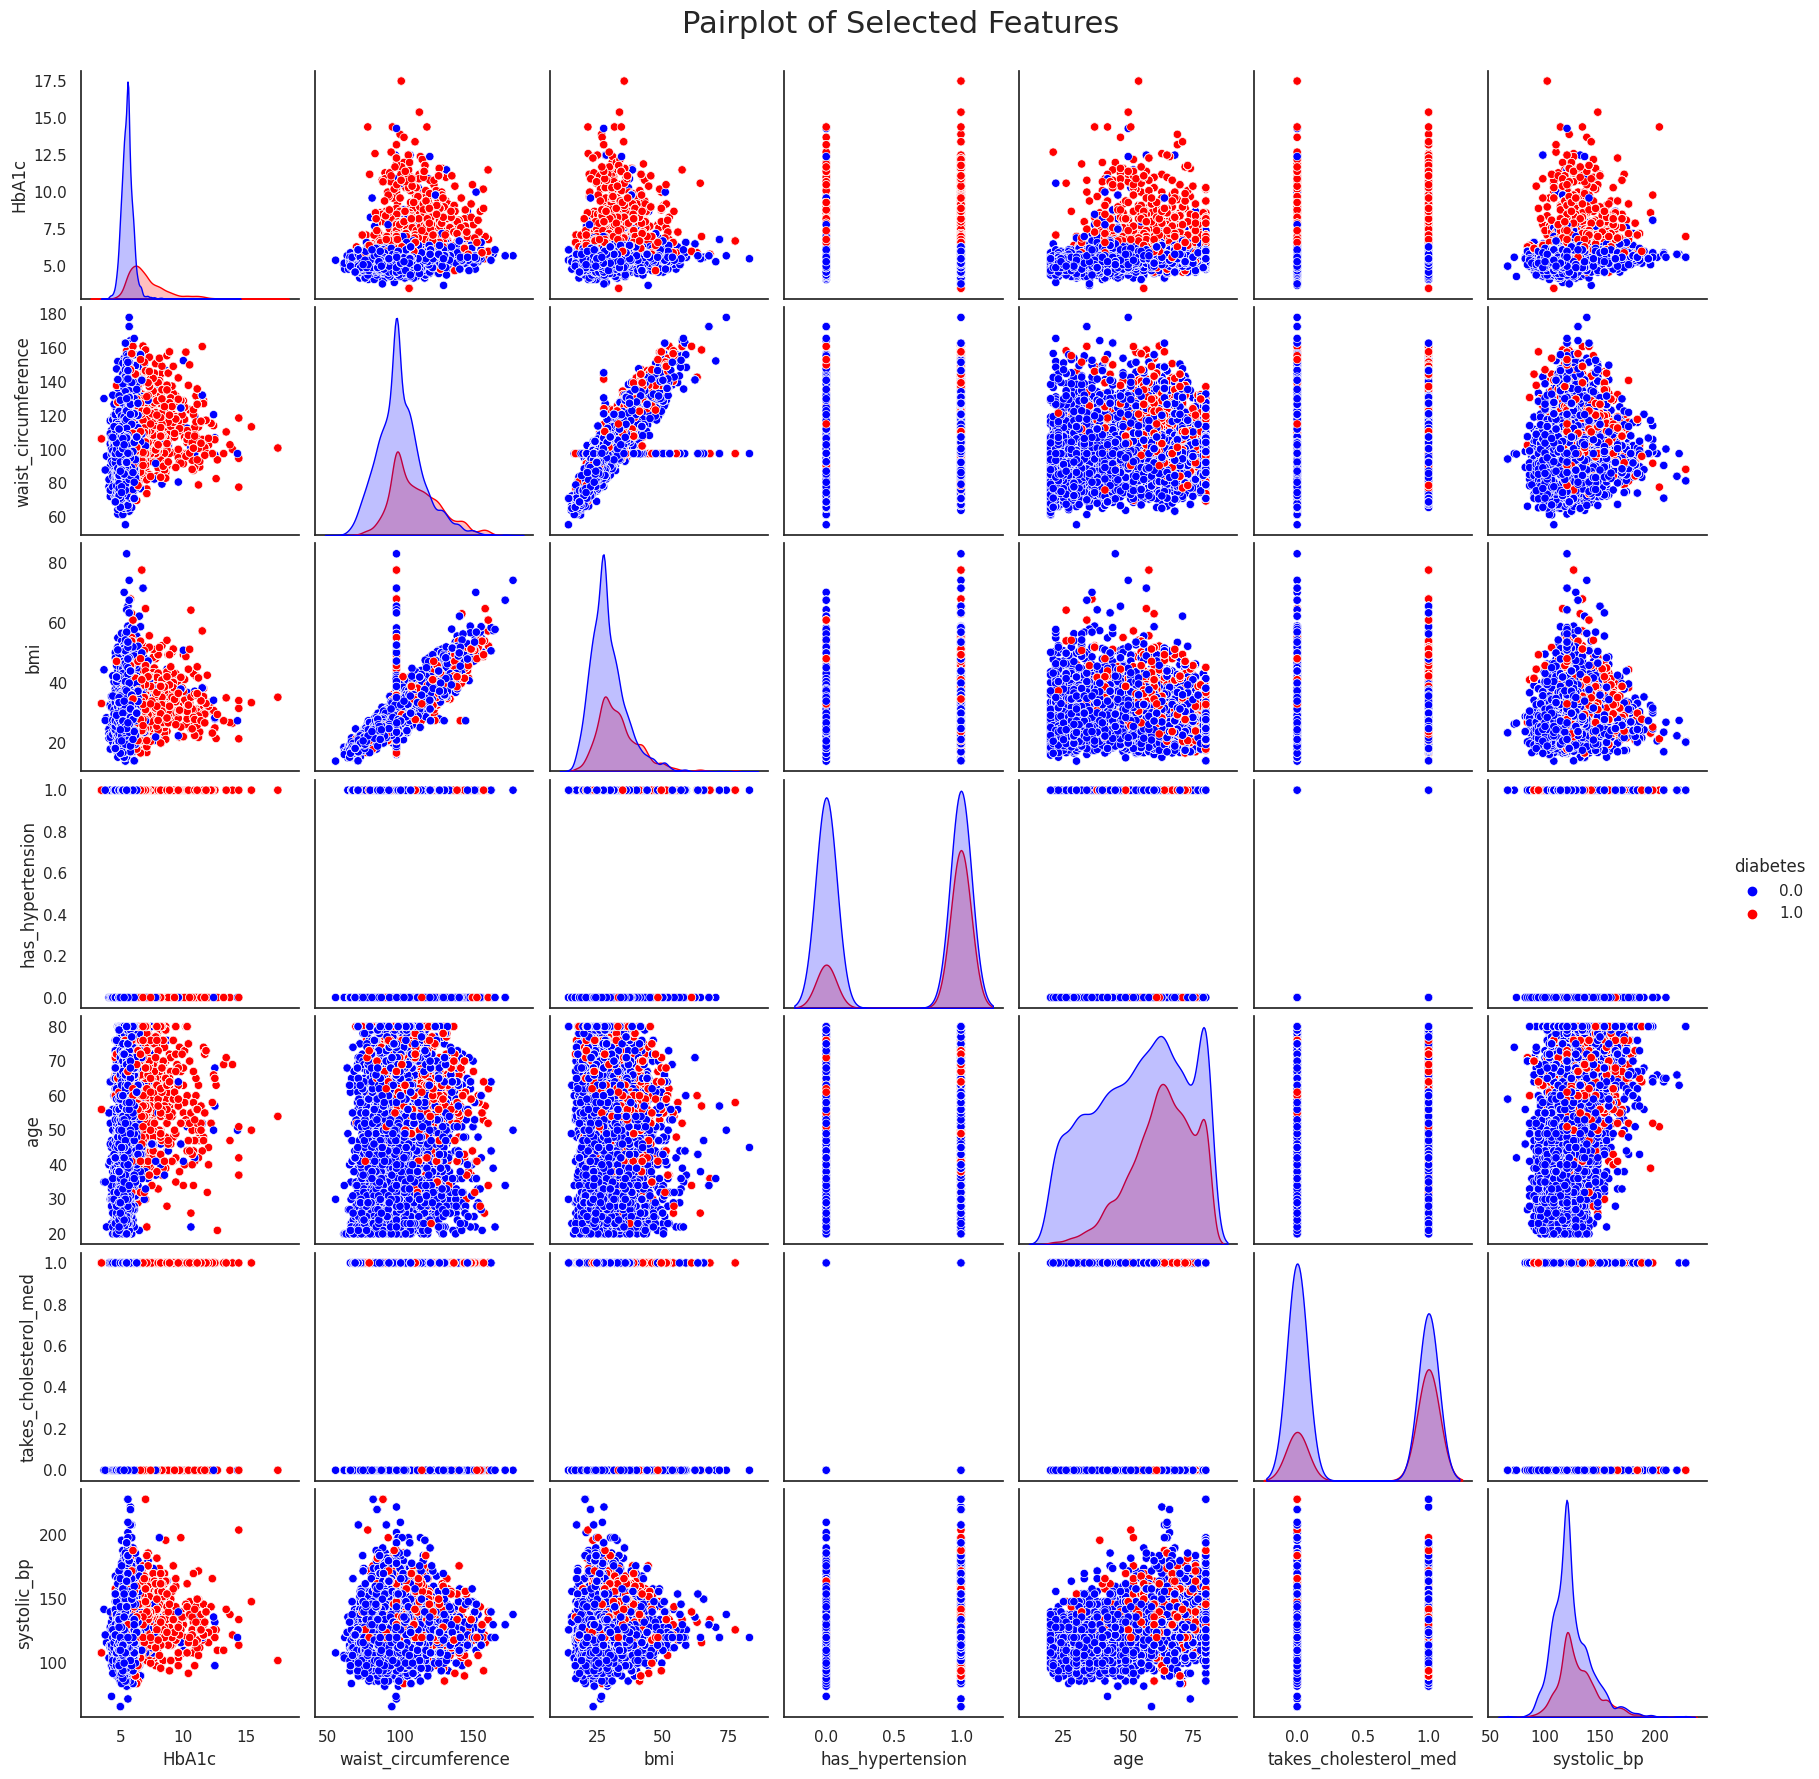

In [22]:
columns_to_plot = ['HbA1c', 'diabetes', 'waist_circumference', 'bmi', 
                   'has_hypertension', 'age', 'takes_cholesterol_med', 'systolic_bp']

subset_df = train_df[columns_to_plot]

sns.pairplot(subset_df, hue='diabetes', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot of Selected Features', fontsize=22, y=1.02)
plt.show()

I appropriately handled the missing values in the dataset, examined the distributions of numeric columns, and checked for outliers. Since the outliers were few, I decided not to remove them, as I thought doing so might lead to overfitting. Next, I appropriately converted the categorical data into numeric format. Finally, I examined the relationships between the selected columns using correlation analysis.

The results I obtained from the correlation analysis were:

* hbA1c - diabetes → strong relationship
* waist_circumference - bmi → strong relationship
* has_hypertension - age → weak relationship
* takes_cholesterol_med - age → weak relationship
* systolic_bp - age → weak relationship

Lastly, I examined the relationships between these features.
### Modelling

In [23]:
X = train_df.drop('diabetes', axis=1)
y = train_df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train dataset size: {X_train.shape}")
print(f"Test dataset size: {X_test.shape}")
print(f"\nTrain dataset distribution of diabetes:\n{y_train.value_counts()}")
print(f"\nTest dataset distibution of diabetes:\n{y_test.value_counts()}")

Train dataset size: (11957, 16)
Test dataset size: (2990, 16)

Train dataset distribution of diabetes:
diabetes
0.0    8231
1.0    3726
Name: count, dtype: int64

Test dataset distibution of diabetes:
diabetes
0.0    2058
1.0     932
Name: count, dtype: int64


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Results
                  precision    recall  f1-score   support

not diabetes (0)       0.91      0.84      0.88      2058
    diabetes (1)       0.70      0.81      0.75       932

        accuracy                           0.83      2990
       macro avg       0.81      0.83      0.81      2990
    weighted avg       0.84      0.83      0.84      2990



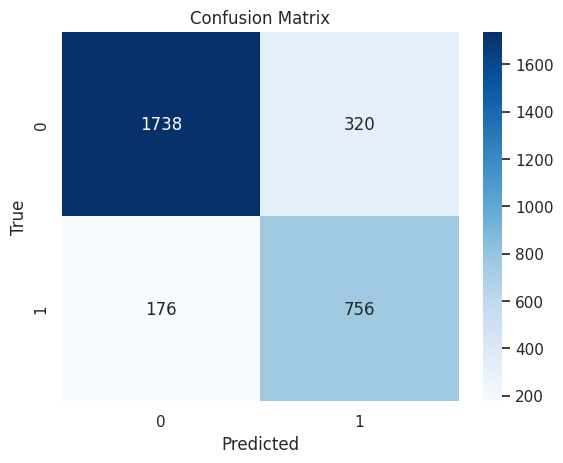

In [25]:
lr_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

lr_model.fit(X_train_scaled, y_train)

lr_y_pred = lr_model.predict(X_test_scaled)
lr_y_proba = lr_model.predict_proba(X_test_scaled)


accuracy = accuracy_score(y_test, lr_y_pred)
f1 = f1_score(y_test, lr_y_pred)
precision = precision_score(y_test, lr_y_pred)
reccal = recall_score(y_test, lr_y_pred)


print("Logistic Regression Results")

print(classification_report(y_test, lr_y_pred, target_names=['not diabetes (0)', 'diabetes (1)']))

cm = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

RandomForest Results
                  precision    recall  f1-score   support

not diabetes (0)       0.99      1.00      0.99      2058
    diabetes (1)       0.99      0.97      0.98       932

        accuracy                           0.99      2990
       macro avg       0.99      0.98      0.98      2990
    weighted avg       0.99      0.99      0.99      2990



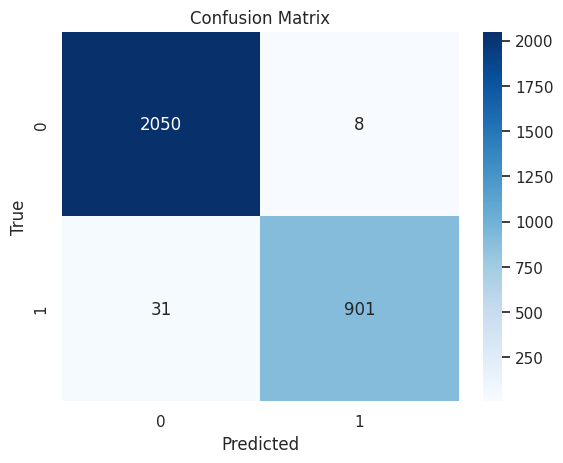

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=15)

rf_model.fit(X_train_scaled, y_train)

rf_y_pred = rf_model.predict(X_test_scaled)
rf_y_proba = rf_model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)
reccal = recall_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)


print("RandomForest Results")

print(classification_report(y_test, rf_y_pred, target_names=['not diabetes (0)', 'diabetes (1)']))

cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Gradient Boosting Results
                  precision    recall  f1-score   support

not diabetes (0)       0.94      0.98      0.96      2058
    diabetes (1)       0.96      0.86      0.90       932

        accuracy                           0.94      2990
       macro avg       0.95      0.92      0.93      2990
    weighted avg       0.94      0.94      0.94      2990



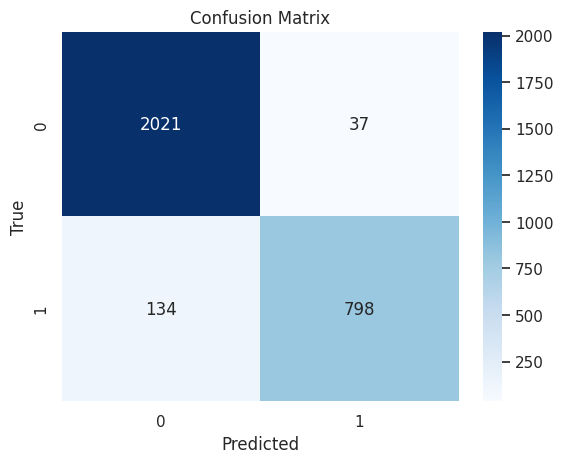

In [27]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)

gb_model.fit(X_train_scaled, y_train)

gb_y_pred = gb_model.predict(X_test_scaled)
gb_y_proba = gb_model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, gb_y_pred)
f1 = f1_score(y_test, gb_y_pred)
precision = precision_score(y_test, gb_y_pred)
reccal = recall_score(y_test, gb_y_pred)

print("Gradient Boosting Results")

print(classification_report(y_test, gb_y_pred, target_names=['not diabetes (0)', 'diabetes (1)']))

cm = confusion_matrix(y_test, gb_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

DecisionTreeClassifier Results
                  precision    recall  f1-score   support

not diabetes (0)       0.96      0.90      0.93      2058
    diabetes (1)       0.80      0.92      0.86       932

        accuracy                           0.90      2990
       macro avg       0.88      0.91      0.89      2990
    weighted avg       0.91      0.90      0.90      2990



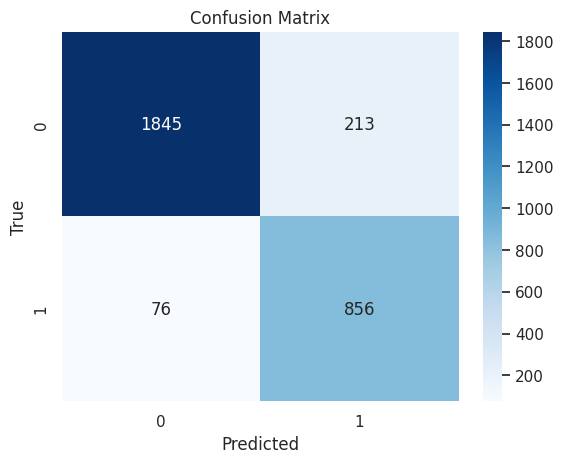

In [28]:
dtc_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)

dtc_model.fit(X_train_scaled, y_train)

dtc_y_pred = dtc_model.predict(X_test_scaled)
dtc_y_proba = dtc_model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, dtc_y_pred)
f1 = f1_score(y_test, dtc_y_pred)
precision = precision_score(y_test, dtc_y_pred)
reccal = recall_score(y_test, dtc_y_pred)

print("DecisionTreeClassifier Results")

print(classification_report(y_test, dtc_y_pred, target_names=['not diabetes (0)', 'diabetes (1)']))

cm = confusion_matrix(y_test, dtc_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

SVM Results
                  precision    recall  f1-score   support

not diabetes (0)       0.93      0.90      0.92      2058
    diabetes (1)       0.80      0.85      0.82       932

        accuracy                           0.89      2990
       macro avg       0.86      0.88      0.87      2990
    weighted avg       0.89      0.89      0.89      2990



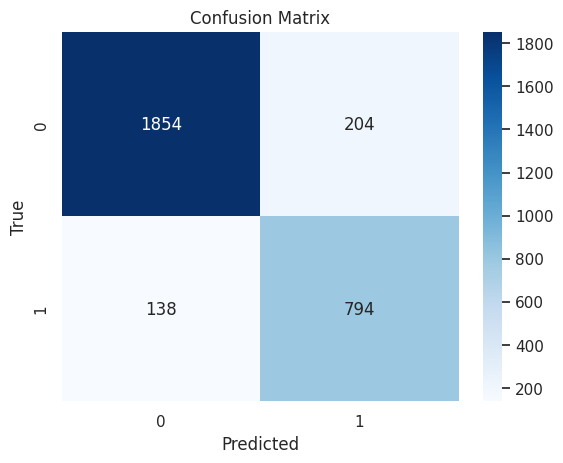

In [29]:
svc_model = SVC(probability=True, random_state=42, class_weight='balanced', kernel='rbf')

svc_model.fit(X_train_scaled, y_train)

svc_y_pred = svc_model.predict(X_test_scaled)
svc_y_proba = svc_model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, svc_y_pred)
f1 = f1_score(y_test, svc_y_pred)
precision = precision_score(y_test, svc_y_pred)
reccal = recall_score(y_test, svc_y_pred)

print("SVM Results")

print(classification_report(y_test, svc_y_pred, target_names=['not diabetes (0)', 'diabetes (1)']))

cm = confusion_matrix(y_test, svc_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Compare all models to select the best one
import pandas as pd

model_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, lr_y_pred),
        accuracy_score(y_test, rf_y_pred),
        accuracy_score(y_test, gb_y_pred),
        accuracy_score(y_test, dtc_y_pred),
        accuracy_score(y_test, svc_y_pred)
    ],
    'F1-Score': [
        f1_score(y_test, lr_y_pred),
        f1_score(y_test, rf_y_pred),
        f1_score(y_test, gb_y_pred),
        f1_score(y_test, dtc_y_pred),
        f1_score(y_test, svc_y_pred)
    ],
    'Precision': [
        precision_score(y_test, lr_y_pred),
        precision_score(y_test, rf_y_pred),
        precision_score(y_test, gb_y_pred),
        precision_score(y_test, dtc_y_pred),
        precision_score(y_test, svc_y_pred)
    ],
    'Recall': [
        recall_score(y_test, lr_y_pred),
        recall_score(y_test, rf_y_pred),
        recall_score(y_test, gb_y_pred),
        recall_score(y_test, dtc_y_pred),
        recall_score(y_test, svc_y_pred)
    ]
}

comparison_df = pd.DataFrame(model_results)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)
print("\n===== Model Comparison =====")
print(comparison_df.to_string(index=False))
print("\nBest model based on F1-Score:", comparison_df.iloc[0]['Model'])


===== Model Comparison =====
              Model  Accuracy  F1-Score  Precision   Recall
      Random Forest  0.986957  0.978816   0.991199 0.966738
  Gradient Boosting  0.942809  0.903226   0.955689 0.856223
      Decision Tree  0.903344  0.855572   0.800748 0.918455
                SVM  0.885619  0.822798   0.795591 0.851931
Logistic Regression  0.834114  0.752988   0.702602 0.811159

Best model based on F1-Score: Random Forest


In [ ]:
import joblib
import json
from pathlib import Path
from datetime import datetime

# Define export directory (relative to notebook location)
export_dir = Path('./weights')
export_dir.mkdir(parents=True, exist_ok=True)

# Check sklearn version for compatibility
import sklearn
print(f"Current sklearn version: {sklearn.__version__}")
print("Exporting models with current sklearn version for compatibility...\n")

# Export Gradient Boosting Model (usually the best performer)
print("Exporting Gradient Boosting Model...")
model_path = export_dir / 'gradient_boosting_model.pkl'
joblib.dump(gb_model, model_path, protocol=4)  # Use protocol 4 for compatibility
print(f"✓ Model saved to: {model_path}")

# Export scaler (critical for preprocessing)
scaler_path = export_dir / 'scaler.pkl'
joblib.dump(scaler, scaler_path, protocol=4)
print(f"✓ Scaler saved to: {scaler_path}")

# Export imputer (for handling missing values in production)
imputer_path = export_dir / 'imputer.pkl'
joblib.dump(imputer, imputer_path, protocol=4)
print(f"✓ Imputer saved to: {imputer_path}")

# Calculate final metrics
final_accuracy = accuracy_score(y_test, gb_y_pred)
final_f1 = f1_score(y_test, gb_y_pred)
final_precision = precision_score(y_test, gb_y_pred)
final_recall = recall_score(y_test, gb_y_pred)

# Save metadata
metadata = {
    'model_type': 'GradientBoostingClassifier',
    'sklearn_version': sklearn.__version__,
    'model_params': {
        'n_estimators': 100,
        'max_depth': 5,
        'random_state': 42
    },
    'feature_names': list(X_train.columns),
    'feature_count': len(X_train.columns),
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'metrics': {
        'accuracy': float(final_accuracy),
        'f1_score': float(final_f1),
        'precision': float(final_precision),
        'recall': float(final_recall)
    },
    'training_date': datetime.now().isoformat(),
    'data_source': 'NHANES Dataset',
    'target_variable': 'diabetes',
    'scaling_method': 'StandardScaler',
    'imputation_strategy': 'median'
}

metadata_path = export_dir / 'model_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"✓ Metadata saved to: {metadata_path}")

print("\n" + "="*60)
print("MODEL EXPORT SUMMARY")
print("="*60)
print(f"Model Type: {metadata['model_type']}")
print(f"sklearn Version: {metadata['sklearn_version']}")
print(f"Features: {metadata['feature_count']}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"\nExport Location: {export_dir.absolute()}")
print("="*60)

In [36]:
# Verify exported files
print("\nVerifying exported files:")
print("-" * 60)

for file_name in ['gradient_boosting_model.pkl', 'scaler.pkl', 'imputer.pkl', 'model_metadata.json']:
    file_path = export_dir / file_name
    if file_path.exists():
        size_kb = file_path.stat().st_size / 1024
        print(f"✓ {file_name:30s} ({size_kb:8.2f} KB)")
    else:
        print(f"✗ {file_name:30s} (NOT FOUND)")

print("-" * 60)
print(f"\nFiles are ready for integration into the backend!")
print(f"Location: {export_dir.absolute()}")


Verifying exported files:
------------------------------------------------------------
✓ gradient_boosting_model.pkl    (  380.59 KB)
✓ scaler.pkl                     (    1.41 KB)
✓ imputer.pkl                    (    0.87 KB)
✓ model_metadata.json            (    0.86 KB)
------------------------------------------------------------

Files are ready for integration into the backend!
Location: /kaggle/working
